In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,geometry
0,1,10046,1,Neighborhood Center,367,116.470509,27442.266223,6.781132,"POLYGON ((417673.698 4563966.754, 417670.801 4..."
1,1,10046,1,Neighborhood Center,368,50.056932,34066.705401,8.418066,"POLYGON ((417794.017 4564191.855, 417812.604 4..."
2,1,10046,1,Neighborhood Center,369,26.905027,19934.704560,4.925973,"POLYGON ((418071.199 4563986.282, 418068.302 4..."
3,1,10046,1,Neighborhood Center,388,350.740952,20979.132171,5.184056,"POLYGON ((417851.282 4563805.801, 417831.754 4..."
4,1,10046,1,Neighborhood Center,390,37.583728,24508.174705,6.056102,"POLYGON ((418063.505 4563947.604, 418056.855 4..."
...,...,...,...,...,...,...,...,...,...
164,43,27575,3,Urban Center,660,214.511206,145066.152805,35.846627,"POLYGON ((415723.125 4549909.935, 415717.331 4..."
165,41,27479,3,Urban Center,702,330.569711,171252.081197,42.317311,"POLYGON ((415831.398 4549099.564, 415825.604 4..."
166,41,27479,3,Urban Center,703,271.852095,799.934731,0.197668,"POLYGON ((415765.529 4549362.525, 415785.828 4..."
167,41,27479,3,Urban Center,709,165.899429,34.043252,0.008412,"POLYGON ((415422.269 4548737.094, 415422.400 4..."


<AxesSubplot:>

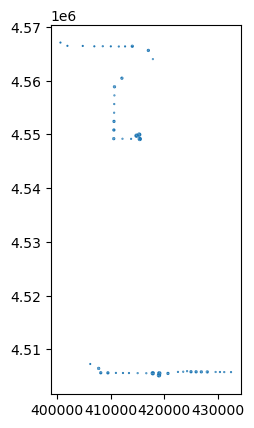

In [3]:
gdf_buffered_stops_with_centers_taz = gpd.read_file('intermediate/buffered-stops-with-centers-taz.geojson')
display(gdf_buffered_stops_with_centers_taz)
gdf_buffered_stops_with_centers_taz.plot()

In [4]:
taz_list = gdf_buffered_stops_with_centers_taz['TAZID'].drop_duplicates()
taz_list

0      367
1      368
2      369
3      388
4      390
      ... 
163    660
165    702
166    703
167    709
168    659
Name: TAZID, Length: 145, dtype: int64

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
29,0,30.0,0.0,703.0,16.2,2.500,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((417012.157 4548237.802, 417011.358 4..."
30,0,31.0,0.0,663.0,5.7,1.900,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((412384.278 4549313.040, 412383.678 4..."
55,0,56.0,0.0,659.0,16.2,2.200,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((415178.137 4550700.321, 415177.935 4..."
56,0,57.0,0.0,671.0,25.0,0.500,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((410591.738 4550764.407, 410590.905 4..."
66,0,68.0,0.0,660.0,16.2,2.200,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((415566.472 4549797.697, 415565.647 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708397,0,762198.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4..."
708398,0,762199.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4..."
708399,0,762200.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4..."
708414,0,762215.0,0.0,185.0,2.0,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4..."


<AxesSubplot:>

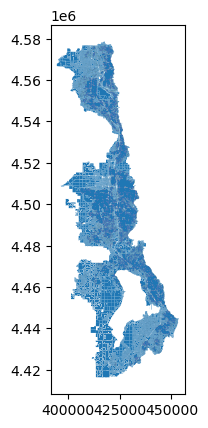

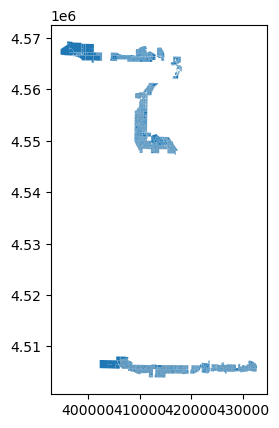

In [5]:
gdf_future_land_use_2050 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2050.shp")
display(gdf_future_land_use_2050)
gdf_future_land_use_2050.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
29,0,30.0,0.0,703.0,16.2,2.500,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((417012.157 4548237.802, 417011.358 4..."
30,0,31.0,0.0,663.0,5.7,1.900,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((412384.278 4549313.040, 412383.678 4..."
55,0,56.0,0.0,659.0,16.2,2.200,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((415178.137 4550700.321, 415177.935 4..."
56,0,57.0,0.0,671.0,25.0,0.500,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((410591.738 4550764.407, 410590.905 4..."
66,0,68.0,0.0,660.0,16.2,2.200,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((415566.472 4549797.697, 415565.647 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708397,0,762198.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4..."
708398,0,762199.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4..."
708399,0,762200.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4..."
708414,0,762215.0,0.0,185.0,2.0,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4..."


<AxesSubplot:>

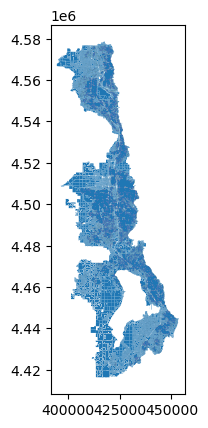

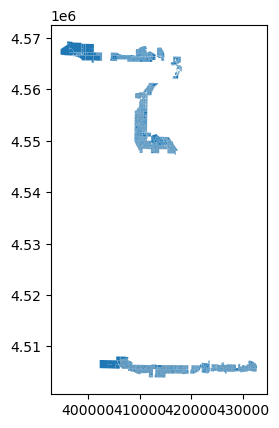

In [6]:
gdf_future_land_use_2023 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2023.shp")
display(gdf_future_land_use_2023)
gdf_future_land_use_2023.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,mixed,other,year,no_build,geometry,area_sqm_flu,area_acres_flu,area_acres_flu_sfonly,HH,EMP
29,0,30.0,0.0,703.0,16.2,2.500,0.0,1.0,1.0,1.0,...,0.0,0.0,2023.0,0.0,"POLYGON ((417012.157 4548237.802, 417011.358 4...",2167.504299,0.535602,0.0,True,True
30,0,31.0,0.0,663.0,5.7,1.900,0.0,1.0,1.0,1.0,...,0.0,0.0,2023.0,0.0,"POLYGON ((412384.278 4549313.040, 412383.678 4...",8228.779810,2.033376,0.0,True,True
55,0,56.0,0.0,659.0,16.2,2.200,0.0,1.0,0.0,1.0,...,0.0,0.0,2023.0,0.0,"POLYGON ((415178.137 4550700.321, 415177.935 4...",2938.220430,0.726050,0.0,True,True
56,0,57.0,0.0,671.0,25.0,0.500,1.0,1.0,0.0,1.0,...,1.0,0.0,2019.0,0.0,"POLYGON ((410591.738 4550764.407, 410590.905 4...",5518.016320,1.363532,0.0,True,True
66,0,68.0,0.0,660.0,16.2,2.200,0.0,1.0,0.0,1.0,...,0.0,0.0,2023.0,0.0,"POLYGON ((415566.472 4549797.697, 415565.647 4...",5836.925178,1.442336,0.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708397,0,762198.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,...,0.0,0.0,2019.0,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,0.0,True,False
708398,0,762199.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,1.0,...,1.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.0,True,True
708399,0,762200.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,...,0.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.0,True,False
708414,0,762215.0,0.0,185.0,2.0,0.425,1.0,0.0,0.0,0.0,...,0.0,0.0,2019.0,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915,0.0,True,False


<AxesSubplot:>

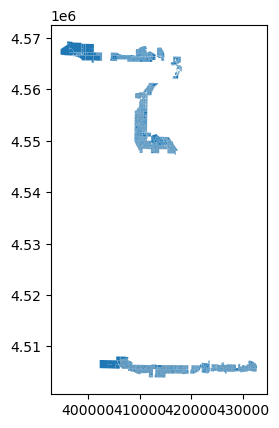

In [61]:
gdf_future_land_use_2050_filtered = gdf_future_land_use_2050[gdf_future_land_use_2050['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2050_filtered['area_sqm_flu'] = gdf_future_land_use_2050_filtered.geometry.area

gdf_future_land_use_2050_filtered['area_acres_flu'] = gdf_future_land_use_2050_filtered['area_sqm_flu'] / 4046.85642

# Define the condition - SF =1 and others =0
condition_SF = (gdf_future_land_use_2050_filtered['sf'] == 1) & (gdf_future_land_use_2050_filtered[['mf','ind','retail','office','govt','mixed','other']].sum(axis=1) == 0)

# Calculate the area and assign it to the new column
gdf_future_land_use_2050_filtered['area_acres_flu_sfonly'] = gdf_future_land_use_2050_filtered['area_acres_flu'].where(condition, 0)

# Define the conditions
condition_HH = (gdf_future_land_use_2050_filtered['sf'] + gdf_future_land_use_2050_filtered['mf']) >= 1
condition_EMP = gdf_future_land_use_2050_filtered[['ind', 'retail', 'office', 'govt', 'mixed', 'other']].sum(axis=1) > 0

# Check if condition is met and assign boolean values
gdf_future_land_use_2050_filtered['HH'] = condition_HH
gdf_future_land_use_2050_filtered['EMP'] = condition_EMP

display(gdf_future_land_use_2050_filtered)
gdf_future_land_use_2050_filtered.plot()

# Calculate Percent Changeable (non-SF only parcels)

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry,area_sqm_flu,area_acres_flu,area_acres_flu_sfonly
29,0,30.0,0.0,703.0,16.2,2.500,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((417012.157 4548237.802, 417011.358 4...",2167.504299,0.535602,0.000000
30,0,31.0,0.0,663.0,5.7,1.900,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((412384.278 4549313.040, 412383.678 4...",8228.779810,2.033376,0.000000
55,0,56.0,0.0,659.0,16.2,2.200,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((415178.137 4550700.321, 415177.935 4...",2938.220430,0.726050,0.000000
56,0,57.0,0.0,671.0,25.0,0.500,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((410591.738 4550764.407, 410590.905 4...",5518.016320,1.363532,0.000000
66,0,68.0,0.0,660.0,16.2,2.200,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((415566.472 4549797.697, 415565.647 4...",5836.925178,1.442336,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708397,0,762198.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,0.451677
708398,0,762199.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.000000
708399,0,762200.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.080572
708414,0,762215.0,0.0,185.0,2.0,0.425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915,0.004915


<AxesSubplot:>

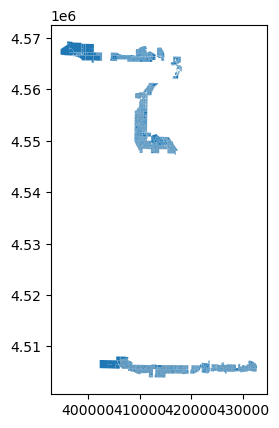

In [41]:
gdf_future_land_use_2023_filtered = gdf_future_land_use_2023[gdf_future_land_use_2023['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2023_filtered['area_sqm_flu'] = gdf_future_land_use_2023_filtered.geometry.area

gdf_future_land_use_2023_filtered['area_acres_flu'] = gdf_future_land_use_2023_filtered['area_sqm_flu'] / 4046.85642

# Define the condition - SF =1 and others =0
condition = (gdf_future_land_use_2023_filtered['sf'] == 1) & (gdf_future_land_use_2023_filtered[['mf','ind','retail','office','govt','mixed','other']].sum(axis=1) == 0) 

# Calculate the area and assign it to the new column
gdf_future_land_use_2023_filtered['area_acres_flu_sfonly'] = gdf_future_land_use_2023_filtered['area_acres_flu'].where(condition, 0)

display(gdf_future_land_use_2023_filtered)
gdf_future_land_use_2023_filtered.plot()

C:\Users\bhereth\AppData\Local\Temp\ipykernel_7256\3081959496.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 49 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_stops_flu_23 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2023_filtered, how='union')


,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,Id,parcel_id,...,mixed,other,year,no_build,area_sqm_flu,area_acres_flu,area_acres_flu_sfonly,geometry,area_sqm_union,area_acres_union
0,1.0,10046,1.0,Neighborhood Center,367.0,116.470509,27442.266223,6.781132,0.0,19006.0,...,0.0,0.0,2019.0,1.0,517.420305,0.127857,0.000000,"POLYGON ((417740.569 4563973.866, 417741.412 4...",517.420305,0.127857
1,1.0,10046,1.0,Neighborhood Center,367.0,116.470509,27442.266223,6.781132,0.0,19010.0,...,0.0,0.0,2019.0,0.0,62317.834608,15.399072,0.000000,"POLYGON ((417670.801 4563986.282, 417669.833 4...",8020.576204,1.981928
2,1.0,10046,1.0,Neighborhood Center,368.0,50.056932,34066.705401,8.418066,0.0,13913.0,...,0.0,0.0,2019.0,1.0,19589.117666,4.840576,0.000000,"POLYGON ((417851.282 4564206.199, 417871.000 4...",19154.451576,4.733168
3,1.0,10046,1.0,Neighborhood Center,368.0,50.056932,34066.705401,8.418066,0.0,15943.0,...,0.0,0.0,2019.0,1.0,10566.671237,2.611081,0.000000,"POLYGON ((417829.282 4564202.683, 417832.502 4...",2573.649473,0.635963
4,1.0,10046,1.0,Neighborhood Center,388.0,350.740952,20979.132171,5.184056,0.0,15943.0,...,0.0,0.0,2019.0,1.0,10566.671237,2.611081,0.000000,"POLYGON ((417832.489 4563808.589, 417836.954 4...",2100.059492,0.518936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45073,NaN,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762198.0,...,0.0,0.0,2019.0,0.0,1827.872840,0.451677,0.451677,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677
45074,NaN,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762199.0,...,1.0,0.0,2019.0,0.0,326.062873,0.080572,0.000000,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572
45075,NaN,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762200.0,...,0.0,0.0,2019.0,0.0,326.062873,0.080572,0.080572,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572
45076,NaN,0,NaN,NaN,185.0,NaN,NaN,NaN,0.0,762215.0,...,0.0,0.0,2019.0,0.0,19.889829,0.004915,0.004915,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915


<AxesSubplot:>

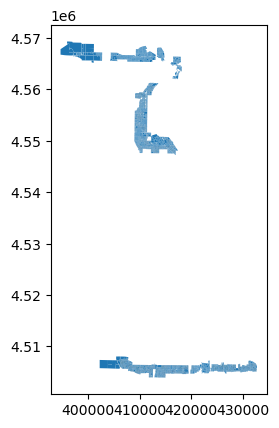

In [131]:
# Perform the intersection of the first two GeoDataFrames
gdf_stops_flu_23 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2023_filtered, how='union')

# Calculate the area in square meters
gdf_stops_flu_23['area_sqm_union'] = gdf_stops_flu_23.geometry.area

# Convert the area to acres
gdf_stops_flu_23['area_acres_union'] = gdf_stops_flu_23['area_sqm_union'] / 4046.85642

# fill null TAZID with value from FLU
gdf_stops_flu_23['TAZID'].fillna(gdf_stops_flu_23['TAZID_900'], inplace=True)

gdf_stops_flu_23['N'].fillna(0, inplace=True)
gdf_stops_flu_23['N'] = gdf_stops_flu_23['N'].astype(int)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_stops_flu_23)
gdf_stops_flu_23.plot()

In [132]:
gdf_stops_flu_23_sum_sf_acres = gdf_stops_flu_23.groupby(['N','project_id','TAZID'], as_index=False).agg(all_acres=('area_acres_flu','sum'), sf_acres=('area_acres_flu_sfonly','sum'))
gdf_stops_flu_23_sum_sf_acres['percent_sf_only'] = gdf_stops_flu_23_sum_sf_acres['sf_acres'] / gdf_stops_flu_23_sum_sf_acres['all_acres']
gdf_stops_flu_23_sum_sf_acres['percent_sf_only'].fillna(0, inplace=True)
gdf_stops_flu_23_sum_sf_acres['percent_changeable'] = 1- gdf_stops_flu_23_sum_sf_acres['percent_sf_only']
gdf_stops_flu_23_sum_sf_acres

,N,project_id,TAZID,all_acres,sf_acres,percent_sf_only,percent_changeable
0,10036,3.0,657.0,35.875523,0.000000,0.000000,1.000000
1,10036,3.0,658.0,61.184352,0.000000,0.000000,1.000000
2,10036,3.0,663.0,335.333969,0.000000,0.000000,1.000000
3,10036,3.0,664.0,76.471005,0.000000,0.000000,1.000000
4,10046,1.0,367.0,15.526930,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...
164,27931,3.0,508.0,13.693164,12.859682,0.939132,0.060868
165,28117,3.0,468.0,26.012190,0.000000,0.000000,1.000000
166,28117,3.0,473.0,21.149481,0.000000,0.000000,1.000000
167,28117,3.0,497.0,9.651271,1.662807,0.172289,0.827711


In [134]:
gdf_stops_flu_23_sum_sf_acres[['N','project_id','TAZID','percent_changeable']].to_csv('intermediate/percent-changeable.csv', index=False)
print('Exported!')

Exported!


# Calcuate portion of TAZ HH and EMP

C:\Users\bhereth\AppData\Local\Temp\ipykernel_7256\3957802425.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 49 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_stops_flu_50 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2050_filtered, how='union')


,index,N,project_id,nearest_AreaType,TAZID,ACRES,area_sqm,area_acres,Id,parcel_id,...,year,no_build,area_sqm_flu,area_acres_flu,area_acres_flu_sfonly,HH,EMP,geometry,area_sqm_union,area_acres_union
0,1.0,10046.0,1.0,Neighborhood Center,367.0,116.470509,27442.266223,6.781132,0.0,19006.0,...,2019.0,1.0,517.420305,0.127857,0.000000,False,False,"POLYGON ((417740.569 4563973.866, 417741.412 4...",517.420305,0.127857
1,1.0,10046.0,1.0,Neighborhood Center,367.0,116.470509,27442.266223,6.781132,0.0,19010.0,...,2019.0,0.0,62317.834608,15.399072,0.000000,False,True,"POLYGON ((417670.801 4563986.282, 417669.833 4...",8020.576204,1.981928
2,1.0,10046.0,1.0,Neighborhood Center,368.0,50.056932,34066.705401,8.418066,0.0,13913.0,...,2019.0,1.0,19589.117666,4.840576,4.840576,False,False,"POLYGON ((417851.282 4564206.199, 417871.000 4...",19154.451576,4.733168
3,1.0,10046.0,1.0,Neighborhood Center,368.0,50.056932,34066.705401,8.418066,0.0,15943.0,...,2019.0,1.0,10566.671237,2.611081,2.611081,False,False,"POLYGON ((417829.282 4564202.683, 417832.502 4...",2573.649473,0.635963
4,1.0,10046.0,1.0,Neighborhood Center,388.0,350.740952,20979.132171,5.184056,0.0,15943.0,...,2019.0,1.0,10566.671237,2.611081,2.611081,False,False,"POLYGON ((417832.489 4563808.589, 417836.954 4...",2100.059492,0.518936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45073,NaN,-1.0,-1.0,NaN,522.0,NaN,NaN,NaN,0.0,762198.0,...,2019.0,0.0,1827.872840,0.451677,0.000000,True,False,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677
45074,NaN,-1.0,-1.0,NaN,522.0,NaN,NaN,NaN,0.0,762199.0,...,2019.0,0.0,326.062873,0.080572,0.000000,True,True,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572
45075,NaN,-1.0,-1.0,NaN,522.0,NaN,NaN,NaN,0.0,762200.0,...,2019.0,0.0,326.062873,0.080572,0.000000,True,False,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572
45076,NaN,-1.0,-1.0,NaN,185.0,NaN,NaN,NaN,0.0,762215.0,...,2019.0,0.0,19.889829,0.004915,0.000000,True,False,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915


<AxesSubplot:>

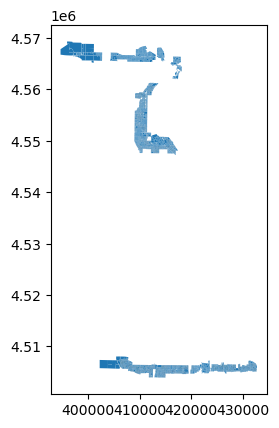

In [94]:
# Perform the intersection of the first two GeoDataFrames
gdf_stops_flu_50 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2050_filtered, how='union')

# Calculate the area in square meters
gdf_stops_flu_50['area_sqm_union'] = gdf_stops_flu_50.geometry.area

# Convert the area to acres
gdf_stops_flu_50['area_acres_union'] = gdf_stops_flu_50['area_sqm_union'] / 4046.85642

# fill null TAZID with value from FLU
gdf_stops_flu_50['TAZID'].fillna(gdf_stops_flu_50['TAZID_900'], inplace=True)

gdf_stops_flu_50[['N', 'project_id']] = gdf_stops_flu_50[['N', 'project_id']].fillna(-1)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_stops_flu_50)
gdf_stops_flu_50.plot()

<AxesSubplot:>

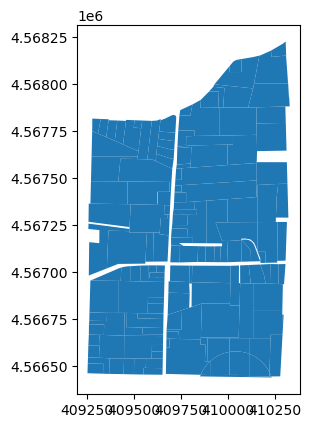

In [110]:
gdf_stops_flu_50[gdf_stops_flu_50['TAZID']==172].plot()

<AxesSubplot:>

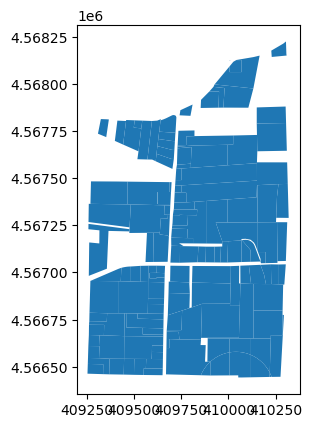

In [111]:
gdf_stops_flu_50[(gdf_stops_flu_50['TAZID']==172) & (gdf_stops_flu_50['HH']==True)].plot()

C:\Users\bhereth\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

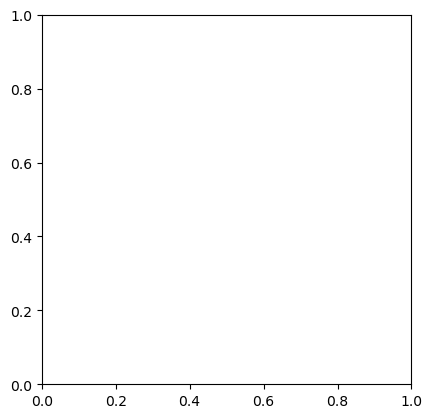

In [115]:
gdf_stops_flu_50[(gdf_stops_flu_50['TAZID']==172) & (gdf_stops_flu_50['EMP']==True)].plot()

In [147]:
# Step 1: Calculate the total sum of area_acres_union for each TAZID
total_area_acres_union_by_tazid = gdf_stops_flu_50[gdf_stops_flu_50['HH'] == True].groupby('TAZID', as_index=False).agg(total_area_acres_union=('area_acres_union', 'sum'))

df_stops_flu_50_HH_areas = gdf_stops_flu_50.copy()

df_stops_flu_50_HH_areas['variable'] = 'TOTHH'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of area_acres_union for HH==True
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas[df_stops_flu_50_HH_areas['HH'] == True].groupby(['TAZID', 'N', 'project_id', 'variable'], as_index=False).agg(area_acres_union_sum=('area_acres_union', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas.merge(total_area_acres_union_by_tazid, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_HH_areas['ratio_of_taz'] = df_stops_flu_50_HH_areas['area_acres_union_sum'] / df_stops_flu_50_HH_areas['total_area_acres_union']

# Display the resulting DataFrame
df_stops_flu_50_HH_areas

,TAZID,N,project_id,variable,area_acres_union_sum,total_area_acres_union,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,40.138821,40.138821,1.000000
1,172.0,-1.0,-1.0,TOTHH,301.574843,310.305654,0.971864
2,172.0,15185.0,1.0,TOTHH,8.730811,310.305654,0.028136
3,173.0,-1.0,-1.0,TOTHH,465.295229,466.744455,0.996895
4,173.0,15184.0,1.0,TOTHH,1.449226,466.744455,0.003105
...,...,...,...,...,...,...,...
267,1520.0,25215.0,2.0,TOTHH,0.253074,96.926031,0.002611
268,1520.0,25351.0,2.0,TOTHH,5.615179,96.926031,0.057933
269,1521.0,-1.0,-1.0,TOTHH,147.467759,164.315675,0.897466
270,1521.0,25351.0,2.0,TOTHH,5.220861,164.315675,0.031773


In [180]:
# Step 1: Calculate the total sum of area_acres_union for each TAZID
total_area_acres_flu_by_tazid_50_emp = gdf_stops_flu_50[gdf_stops_flu_50['EMP'] == True].groupby('TAZID', as_index=False).agg(total_area_acres_union=('area_acres_union', 'sum'))

df_stops_flu_50_EMP_areas = gdf_stops_flu_50.copy()

df_stops_flu_50_EMP_areas['variable'] = 'TOTEMP'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of area_acres_union for EMP==True
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas[df_stops_flu_50_EMP_areas['EMP'] == True].groupby(['TAZID', 'N', 'project_id', 'variable'], as_index=False).agg(area_acres_union_sum=('area_acres_union', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas.merge(total_area_acres_flu_by_tazid_50_emp, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_EMP_areas['ratio_of_taz'] = df_stops_flu_50_EMP_areas['area_acres_union_sum'] / df_stops_flu_50_EMP_areas['total_area_acres_union']

# Display the resulting DataFrame
df_stops_flu_50_EMP_areas

,TAZID,N,project_id,variable,area_acres_union_sum,total_area_acres_union,ratio_of_taz
0,165.0,-1.0,-1.0,TOTEMP,3370.473916,3399.126447,0.991571
1,165.0,15191.0,1.0,TOTEMP,28.652530,3399.126447,0.008429
2,176.0,-1.0,-1.0,TOTEMP,71.107227,79.406393,0.895485
3,176.0,15183.0,1.0,TOTEMP,8.299166,79.406393,0.104515
4,177.0,-1.0,-1.0,TOTEMP,347.028241,373.290579,0.929646
...,...,...,...,...,...,...,...
266,1520.0,-1.0,-1.0,TOTEMP,3.841681,5.289500,0.726284
267,1520.0,25215.0,2.0,TOTEMP,0.502185,5.289500,0.094940
268,1520.0,25351.0,2.0,TOTEMP,0.945633,5.289500,0.178776
269,1521.0,-1.0,-1.0,TOTEMP,5.477001,6.891638,0.794731


In [181]:
df_stops_flu_50_areas = pd.concat([df_stops_flu_50_HH_areas, df_stops_flu_50_EMP_areas])
df_stops_flu_50_areas = df_stops_flu_50_areas[['TAZID','N','project_id','variable','ratio_of_taz']]
df_stops_flu_50_areas

,TAZID,N,project_id,variable,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,1.000000
1,172.0,-1.0,-1.0,TOTHH,0.971864
2,172.0,15185.0,1.0,TOTHH,0.028136
3,173.0,-1.0,-1.0,TOTHH,0.996895
4,173.0,15184.0,1.0,TOTHH,0.003105
...,...,...,...,...,...
266,1520.0,-1.0,-1.0,TOTEMP,0.726284
267,1520.0,25215.0,2.0,TOTEMP,0.094940
268,1520.0,25351.0,2.0,TOTEMP,0.178776
269,1521.0,-1.0,-1.0,TOTEMP,0.794731


In [182]:
df_stops_flu_50_areas

,TAZID,N,project_id,variable,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,1.000000
1,172.0,-1.0,-1.0,TOTHH,0.971864
2,172.0,15185.0,1.0,TOTHH,0.028136
3,173.0,-1.0,-1.0,TOTHH,0.996895
4,173.0,15184.0,1.0,TOTHH,0.003105
...,...,...,...,...,...
266,1520.0,-1.0,-1.0,TOTEMP,0.726284
267,1520.0,25215.0,2.0,TOTEMP,0.094940
268,1520.0,25351.0,2.0,TOTEMP,0.178776
269,1521.0,-1.0,-1.0,TOTEMP,0.794731


In [183]:
df_stops_flu_50_areas[df_stops_flu_50_areas['TAZID']==165]

,TAZID,N,project_id,variable,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,1.000000
0,165.0,-1.0,-1.0,TOTEMP,0.991571
1,165.0,15191.0,1.0,TOTEMP,0.008429


In [184]:
df_stops_flu_50_areas_pivot = df_stops_flu_50_areas.pivot(index=['TAZID','N','project_id'], columns='variable', values='ratio_of_taz')
df_stops_flu_50_areas_pivot.reset_index(inplace=True)
df_stops_flu_50_areas_pivot.fillna(0,inplace=True)
df_stops_flu_50_areas_pivot.to_csv('intermediate/area-ratio-of-taz.csv', index=False)
print('Exported!')

Exported!
